# PyTorch Data Preprocess

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# torch 를 import 하기 전에
# 먼저 imshow() 해줘야 나중에 정상적으로 시각화 되더라.

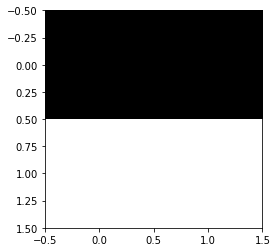

In [3]:
d = np.array([[0, 0],[200, 200]])
plt.imshow(d, 'gray')
plt.show()

In [5]:
import torch
from torchvision import datasets, transforms

# datasets : 예제 데이터 들이 담겨 잇다.
# transforms : 데이터 변환

In [7]:
torch.__version__

'1.8.1+cpu'

## Data Loader 부르기
PyTorch 는 DataLoader 를 불러 model 에 넣음

In [8]:
# TensorFlow 에선 tf.data 에 batch size 를 조절해주었는데
# Torch 에선 DataLoader 에 batch size 를 넣어줍니다

In [9]:
batch_size = 32
test_batch_size = 32

In [10]:
save_dir = r'D:\DevRoot\DataSet\torch\dataset'

In [11]:
train_loader = torch.utils.data.DataLoader(  # DataLoader() 는 정말 많이 사용하게 된다.
    # dataset : 여기선 MNIST 예제를 불러옴
    datasets.MNIST(
        save_dir    # 저장할 디렉토리
        , train=True   # 학습용
        , download = True  # 없으면 다운로드
        , transform = transforms.Compose([
                transforms.ToTensor()   # 데이터 다운받은뒤 Tensor 로 받아올거임.
                , transforms.Normalize(mean=(0.5, ), std=(0.5, ))  # 평균값 0.5, std 는 0.5 로
        ]))
    
    , batch_size=batch_size
    , shuffle = True   
)


Extracting D:\DevRoot\DataSet\torch\dataset\MNIST\raw\train-images-idx3-ubyte.gz to D:\DevRoot\DataSet\torch\dataset\MNIST\raw




Extracting D:\DevRoot\DataSet\torch\dataset\MNIST\raw\train-labels-idx1-ubyte.gz to D:\DevRoot\DataSet\torch\dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting D:\DevRoot\DataSet\torch\dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to D:\DevRoot\DataSet\torch\dataset\MNIST\raw




Extracting D:\DevRoot\DataSet\torch\dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to D:\DevRoot\DataSet\torch\dataset\MNIST\raw

Processing...


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [12]:
# 위는 train loader 
# 이제 test loader 를 생성

In [13]:
test_loader = torch.utils.data.DataLoader(  # DataLoader() 는 정말 많이 사용하게 된다.
    # dataset : 여기선 MNIST 예제를 불러옴
    datasets.MNIST(
        save_dir  
        , train=False # 학습모드가 아니니까 False
        , transform = transforms.Compose([
                transforms.ToTensor()   # 데이터 다운받은뒤 Tensor 로 받아올거임.
                , transforms.Normalize(mean=(0.5, ), std=(0.5, ))  # test 에서도 동일하게 normalize 해준다.
        ]))
    
    , batch_size=batch_size
    , shuffle = True   
)

# 데이터가 없었으면 다운로드 받게 될것이다.

# 데이터 확인

In [15]:
type(train_loader), type(test_loader)

(torch.utils.data.dataloader.DataLoader,
 torch.utils.data.dataloader.DataLoader)

In [16]:
# DataLoader <= iterable 하다

In [17]:
images, labels = next(iter(train_loader))  # 첫번째 배치

In [18]:
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# TensorFlow 에선 [32, 28, 28, 1] 즉 [batch size, width, height, channel] 이었다.
# PyTorch 는 TensorFlow 와 다르게 [batch size, channel, height, width] 임을 명심.

# 만약 gray 가 아니라 rgb 였다면 [32, 3, 28, 28] 이 되겠죠.

# 데이터 시각화

In [19]:
images[0].shape   # batch 안에서 첫번째 이미지

torch.Size([1, 28, 28])

In [20]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [21]:
image = torch_image.numpy()
image.shape

(28, 28)

In [22]:
# 다음은 label
label = labels[0].numpy()
label.shape

()

In [23]:
label

array(3, dtype=int64)

In [24]:
np.min(image), np.max(image)

(-1.0, 1.0)

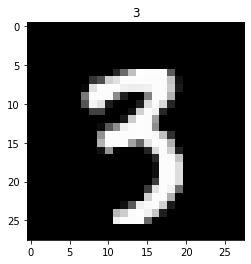

In [25]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

데이터 불러올때는 DataLoader() 를 많이 사용하게 될겁니다.

PyTorch 의 좋은점..

TensorFlow 는 너~ 무 많은 방법으로 접근이 가능하여 (혼란 가중)

PyTorch 는 DataLoader() 처럼 아예 주어진다는 점이 좋다.  (걍 이걸로 써!  그런 느낌?)  